In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/blinkit_data.csv')

In [10]:
print(f'Size of data: {df.shape}')

Size of data: (8523, 12)


In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [12]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [13]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [14]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat':'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

In [16]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**KPI's Requirement**

In [22]:
# Total Sales
total_sales = df['Sales'].sum().round(2)

# Average Sales
avg_sales = df['Sales'].mean().round(2)

# No. of item sold
no_of_item_sold = df['Sales'].count().round(2)

# Average Ratings
avg_ratings = df['Rating'].mean().round(2)


print(f'Total Sales: {total_sales}')
print(f'Average Sales: {avg_sales}')
print(f'No of items sold : {no_of_item_sold}')
print(f'Average rating: {avg_ratings}')

Total Sales: 1201681.48
Average Sales: 140.99
No of items sold : 8523
Average rating: 3.97


**Chart Requirement**

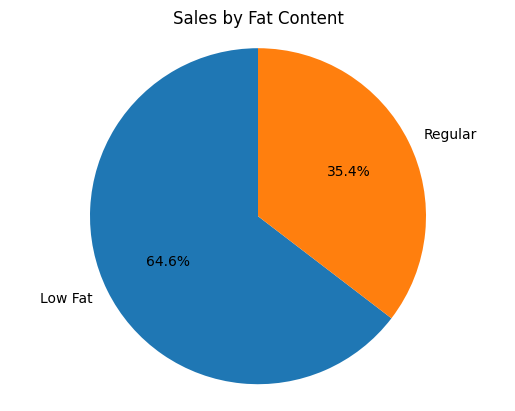

In [27]:
# Total Sales by Fat Content

sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(
    sales_by_fat,labels = sales_by_fat.index,autopct = '%.1f%%',startangle = 90
)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

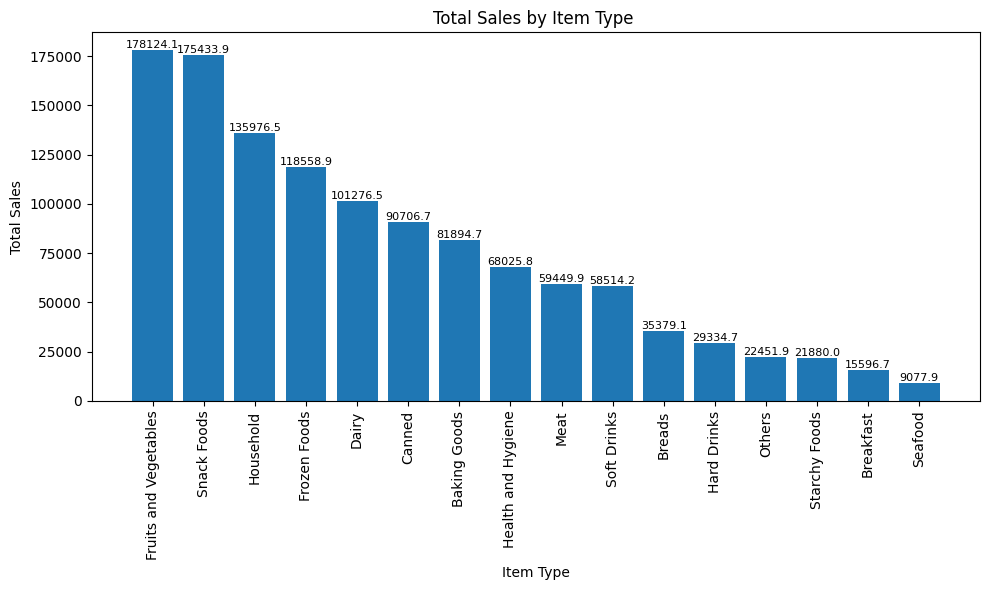

In [36]:
# Total Sales by item type

sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False).round(1)

plt.figure(figsize = (10,6))
plt.bar(
    sales_by_type.index,sales_by_type.values
)

plt.title('Total Sales by Item Type ')
plt.xlabel('Item Type')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales')

for i , v in enumerate(sales_by_type.values):
  plt.text(i,v+1000,str(v),ha = 'center',fontsize = 8)

plt.tight_layout()
plt.show()

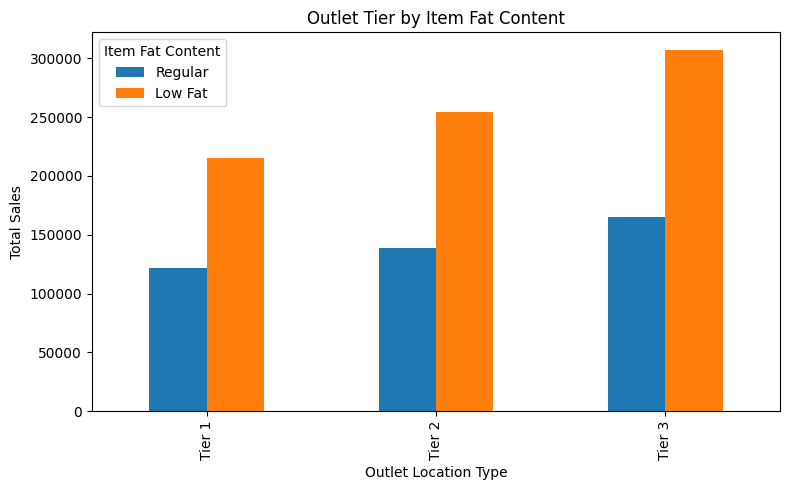

In [51]:
# Fat Content by outlet for total sales

grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar',figsize = (8,5),title = 'Outlet Tier by Item Fat Content')

plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

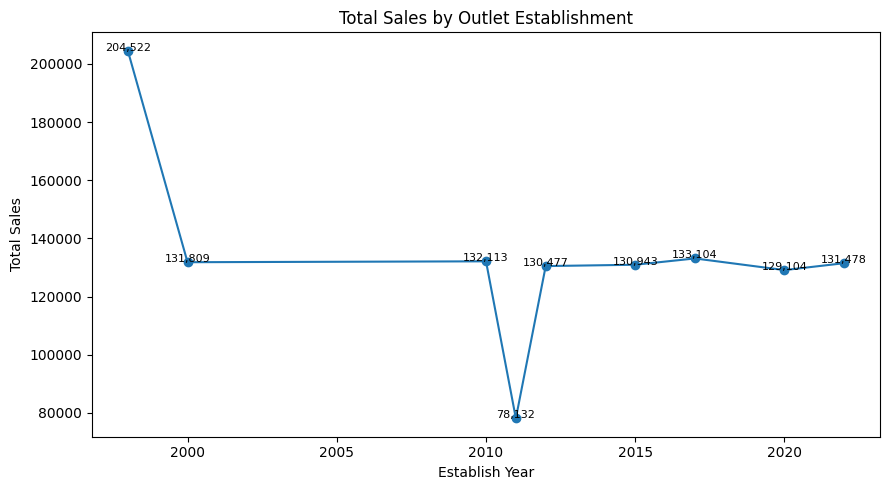

In [67]:
# Total Sales by Outlet Establishment

result = df.groupby('Outlet Establishment Year')['Sales'].sum().round(1)

plt.figure(figsize = (9,5))
plt.plot(
    result.index,
    result.values,
    marker = 'o',
    linestyle = '-'
)

plt.title('Total Sales by Outlet Establishment')
plt.xlabel('Establish Year')
plt.ylabel('Total Sales')

for i , v in zip(result.index , result.values):
  plt.text(i,v,f'{v:,.0f}',ha = 'center' ,fontsize = 8)

plt.tight_layout()
plt.show()

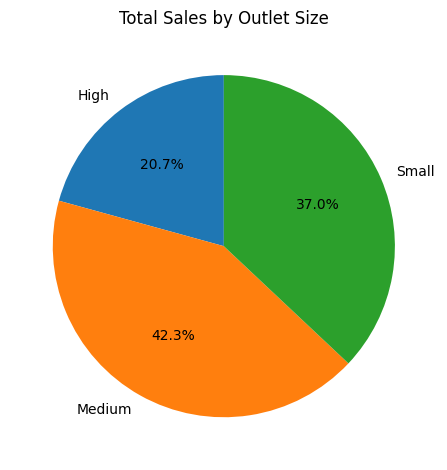

In [74]:
# Sales By Outlet Size

sales_outlet = df.groupby('Outlet Size')['Sales'].sum().round(1)


plt.pie(
    sales_outlet,
    labels = sales_outlet.index,
    autopct = '%0.1f%%',
    startangle = 90
)

plt.title('Total Sales by Outlet Size')
plt.tight_layout()
plt.show()

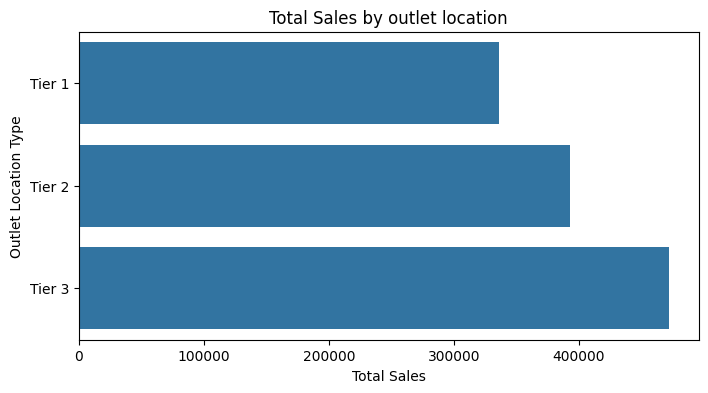

In [83]:
# Sales by outlet location

result = df.groupby('Outlet Location Type')['Sales'].sum().round(1)

plt.figure(figsize = (8,4))
sns.barplot(
    x = result.values,
    y = result.index
)

plt.title('Total Sales by outlet location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.show()